In [1]:
import pandas as pd
import numpy as np

from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
raw_data = pd.read_excel('../../data/market_data.xlsx')

### There is no missing data. 

- Seems like data pre-processing is barely needed 

- need to seperate them into training data and validation data tho, so that we won't have data leakage problems when training our models)

In [3]:
raw_data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63457 entries, 0 to 63456
Data columns (total 13 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Time (UTC+10)                                           63457 non-null  datetime64[ns]
 1   Regions NSW Trading Price ($/MWh)                       63457 non-null  float64       
 2   Regions SA Trading Price ($/MWh)                        63457 non-null  float64       
 3   Regions TAS Trading Price ($/MWh)                       63457 non-null  float64       
 4   Regions VIC Trading Price ($/MWh)                       63457 non-null  float64       
 5   Regions NSW Trading Total Intermittent Generation (MW)  63457 non-null  float64       
 6   Regions SA Trading Total Intermittent Generation (MW)   63457 non-null  float64       
 7   Regions TAS Trading Total Intermittent Generation (MW)  63

In [4]:
raw_data.describe()

,Regions NSW Trading Price ($/MWh),Regions SA Trading Price ($/MWh),Regions TAS Trading Price ($/MWh),Regions VIC Trading Price ($/MWh),Regions NSW Trading Total Intermittent Generation (MW),Regions SA Trading Total Intermittent Generation (MW),Regions TAS Trading Total Intermittent Generation (MW),Regions VIC Trading Total Intermittent Generation (MW),Regions NSW Operational Demand (MW),Regions SA Operational Demand (MW),Regions TAS Operational Demand (MW),Regions VIC Operational Demand (MW)
count,63457.000000,63457.000000,63457.000000,63457.000000,63457.000000,63457.000000,63457.000000,63457.000000,63457.000000,63457.000000,63457.000000,63457.000000
mean,76.490073,77.168657,64.705163,78.746880,65.665476,112.431257,103.323441,169.029236,7977.524371,1399.975905,1172.162898,5083.026018
std,206.959029,302.062059,82.680094,289.259796,55.152681,80.120747,48.436695,114.763946,1251.105505,339.076961,140.736186,862.678623
min,-139.930000,-919.780000,-844.650000,-676.370000,-1.390000,-1.790000,0.000000,-0.860000,5310.000000,300.000000,711.000000,2529.000000
25%,42.060000,39.090000,32.840000,39.010000,19.050000,44.000000,63.710000,70.080000,7068.000000,1208.000000,1068.000000,4438.000000
50%,61.130000,64.830000,55.640000,64.110000,50.870000,97.460000,98.950000,152.060000,7843.000000,1373.000000,1149.000000,4972.000000
75%,83.630000,95.020000,87.780000,94.850000,105.150000,169.900000,141.650000,257.320000,8686.000000,1571.000000,1252.000000,5585.000000
max,14700.000000,14700.000000,4551.390000,14700.000000,228.700000,334.970000,235.480000,467.480000,13835.000000,3240.000000,1724.000000,9667.000000


- There are negative trading prices, are those errors? or is it the `market floor price to guarantee dispatch`?
- minimum `Trading Total Intermittent Generation` in Vic is -0.860000, is this normal?

## We only need Victoria's data for the mandatory task.

In [3]:
victoria = raw_data[['Time (UTC+10)', 
                     'Regions VIC Trading Price ($/MWh)',
                     'Regions VIC Trading Total Intermittent Generation (MW)',
                     'Regions VIC Operational Demand (MW)' ]]

In [4]:
victoria['Time'] = victoria['Time (UTC+10)'].dt.time

In [5]:
victoria['Hour'] = victoria['Time (UTC+10)'].dt.hour

In [6]:
victoria['Day'] = victoria['Time (UTC+10)'].dt.dayofweek+1

In [7]:
victoria.to_csv('../../data/victoria.csv')

## Seperating training data from testing data

In [8]:
vic_training = victoria.loc[(victoria['Time (UTC+10)'] >= '2018-01-01') &
                            (victoria['Time (UTC+10)'] < '2021-01-01')]

In [10]:
vic_validation = victoria.loc[(victoria['Time (UTC+10)'] > '2020-12-31') &
                           (victoria['Time (UTC+10)'] < '2021-07-01')]

In [8]:
vic_training

,Time (UTC+10),Regions VIC Trading Price ($/MWh),Regions VIC Trading Total Intermittent Generation (MW),Regions VIC Operational Demand (MW),Time,Hour,Day
0,2018-01-01 00:00:00,90.43,146.87,4599,00:00:00,0,1
1,2018-01-01 00:30:00,92.46,131.68,4398,00:30:00,0,1
2,2018-01-01 01:00:00,87.62,119.98,4238,01:00:00,1,1
3,2018-01-01 01:30:00,73.08,123.86,4112,01:30:00,1,1
4,2018-01-01 02:00:00,70.18,132.72,3956,02:00:00,2,1
...,...,...,...,...,...,...,...
52603,2020-12-31 21:30:00,35.05,295.14,4421,21:30:00,21,4
52604,2020-12-31 22:00:00,35.49,272.81,4353,22:00:00,22,4
52605,2020-12-31 22:30:00,48.25,221.45,4323,22:30:00,22,4
52606,2020-12-31 23:00:00,38.66,189.40,4330,23:00:00,23,4


In [12]:
# spot price at 2020/07/01 15:00:00 is $20.7
vic_training.loc[vic_training['Time (UTC+10)'] == '2020-07-01 15:00:00']

,Time (UTC+10),Regions VIC Trading Price ($/MWh),Regions VIC Trading Total Intermittent Generation (MW),Regions VIC Operational Demand (MW),Time,Hour,Day
43806,2020-07-01 15:00:00,20.7,335.54,5101,15:00:00,15,3


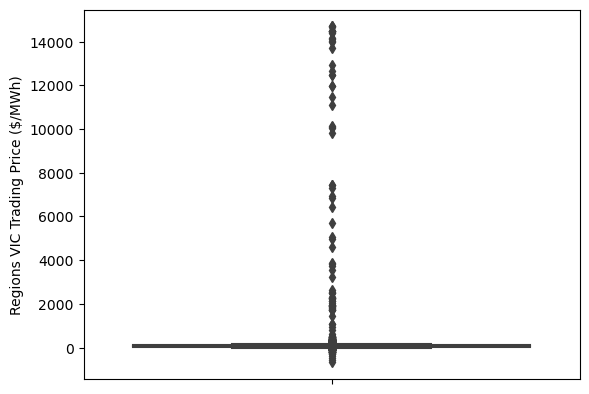

In [13]:
sns.boxplot(y = vic_training['Regions VIC Trading Price ($/MWh)'])
plt.show()

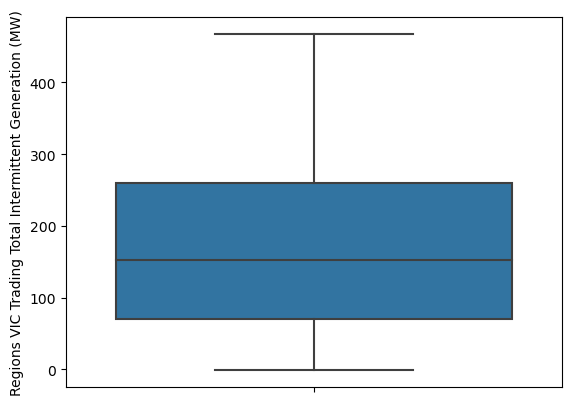

In [14]:
sns.boxplot(y = vic_training['Regions VIC Trading Total Intermittent Generation (MW)'])
plt.show()

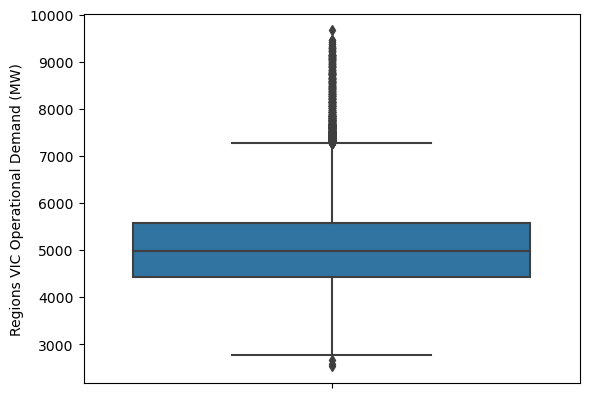

In [15]:
sns.boxplot(y = vic_training['Regions VIC Operational Demand (MW)'])
plt.show()

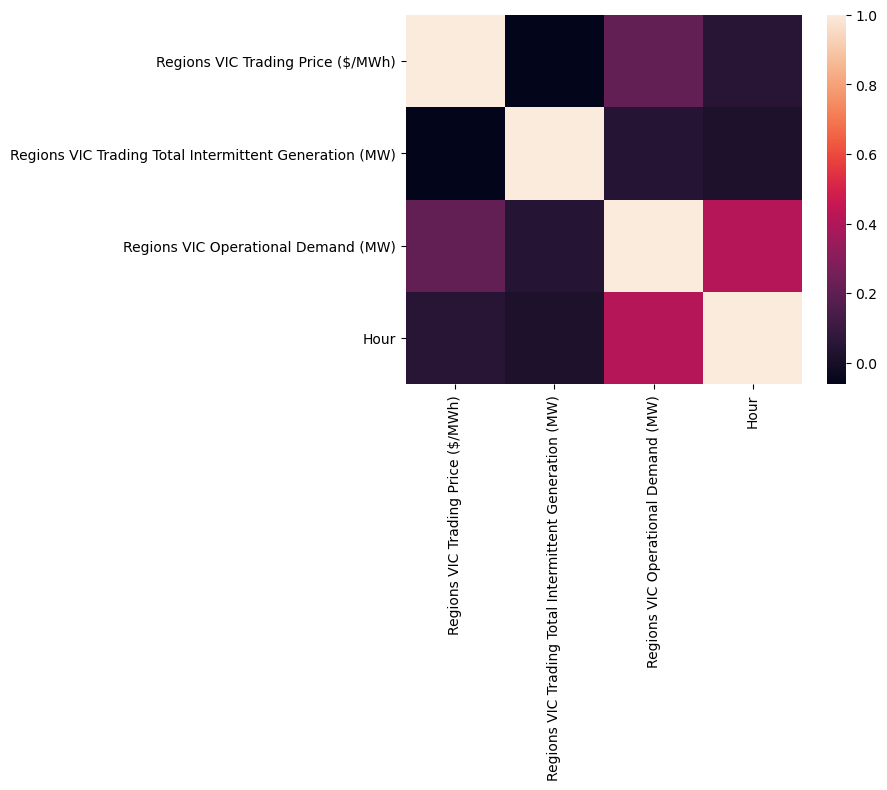

In [16]:
#vic_training.iloc[:,1:5]
sns.heatmap(vic_training.iloc[:,1:6].corr())
plt.show()

`Hour` is moderately correlated with `operational demand`, this means that demand varies with time.

There is a slight correlation between `demand` and `price`.

Surprisingly, there is barely a correlation between `intermittent generation` and `demand` and there is no correlation between `intermittent generation` and `price`.

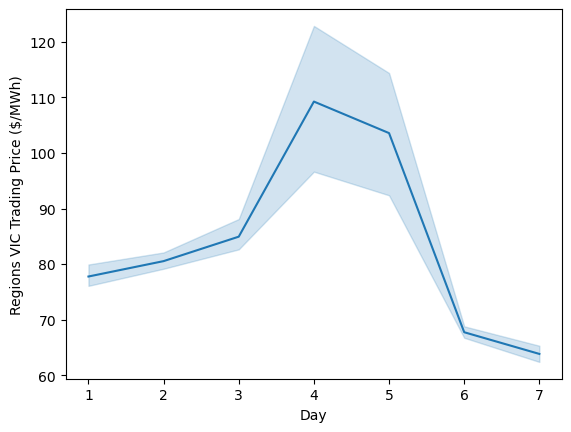

In [17]:
sns.lineplot(x=vic_training['Day'], y=vic_training['Regions VIC Trading Price ($/MWh)'])
plt.show()

Trading price is at its lowest in the early morning, this gives us an intuition that we might want to charge our batteries during this time period.

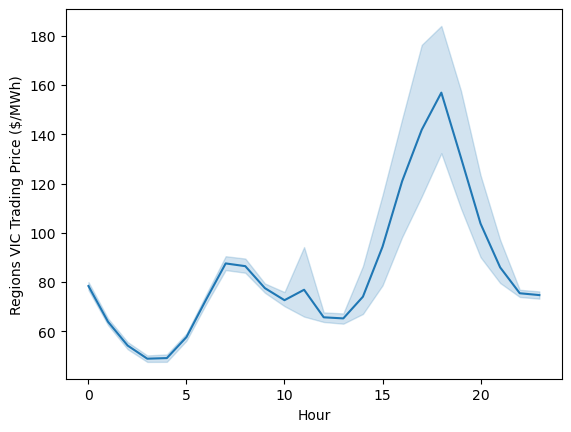

In [18]:
sns.lineplot(x=vic_training['Hour'], y=vic_training['Regions VIC Trading Price ($/MWh)'])
plt.show()

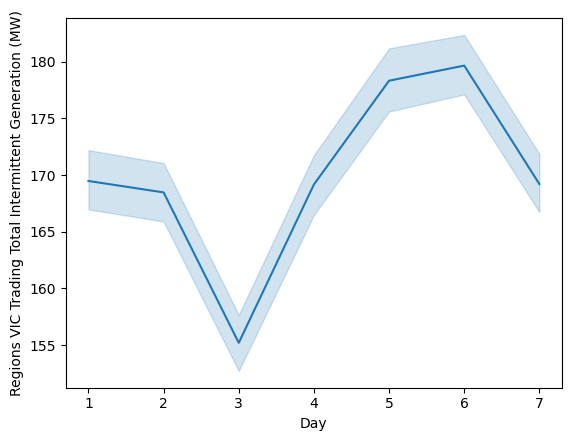

In [19]:
sns.lineplot(x=vic_training['Day'], y=vic_training['Regions VIC Trading Total Intermittent Generation (MW)'])
plt.show()

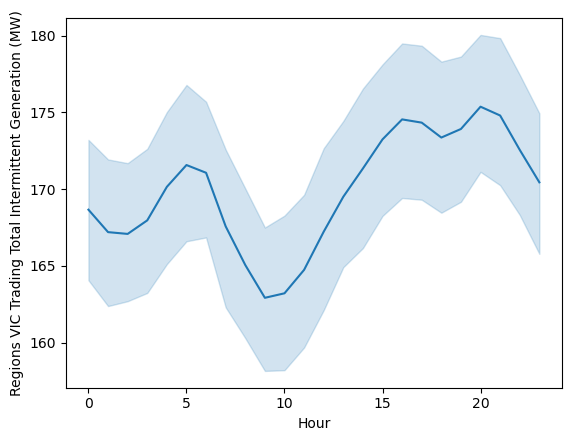

In [20]:
sns.lineplot(x=vic_training['Hour'], y=vic_training['Regions VIC Trading Total Intermittent Generation (MW)'])
plt.show()

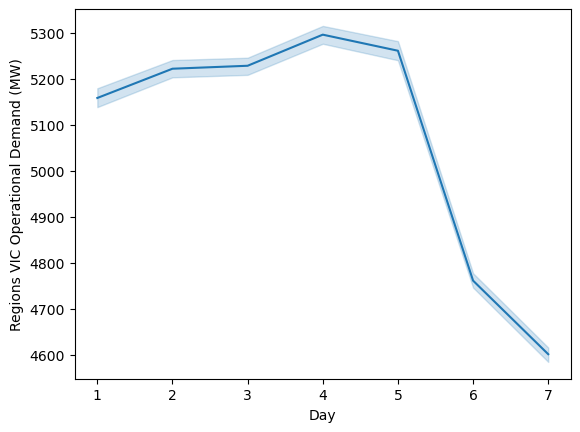

In [21]:
sns.lineplot(x=vic_training['Day'], y=vic_training['Regions VIC Operational Demand (MW)'])
plt.show()

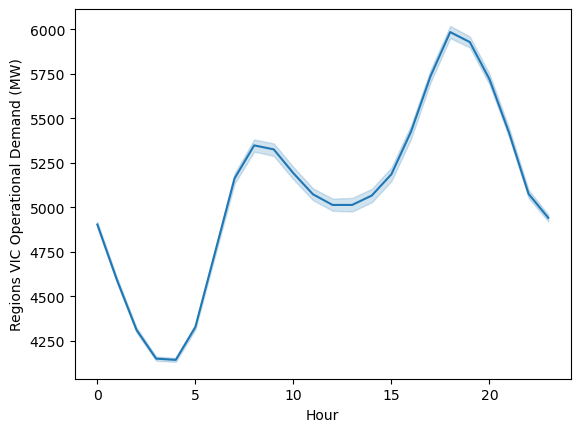

In [22]:
sns.lineplot(x=vic_training['Hour'], y=vic_training['Regions VIC Operational Demand (MW)'])
plt.show()

In [9]:
vic_summer = vic_training.loc[((vic_training['Time (UTC+10)'] >= '2018-01-01') &
                            (vic_training['Time (UTC+10)'] < '2018-03-01')) |
                         ((vic_training['Time (UTC+10)'] >= '2019-01-01') &
                            (vic_training['Time (UTC+10)'] < '2019-03-01')) |
                         ((vic_training['Time (UTC+10)'] >= '2020-01-01') &
                            (vic_training['Time (UTC+10)'] < '2020-03-01'))]


In [11]:
vic_autumn = vic_training.loc[((vic_training['Time (UTC+10)'] >= '2018-03-01') &
                            (vic_training['Time (UTC+10)'] < '2018-06-01')) |
                         ((vic_training['Time (UTC+10)'] >= '2019-03-01') &
                            (vic_training['Time (UTC+10)'] < '2019-06-01')) |
                         ((vic_training['Time (UTC+10)'] >= '2020-03-01') &
                            (vic_training['Time (UTC+10)'] < '2020-06-01'))]


In [12]:
vic_winter = vic_training.loc[((vic_training['Time (UTC+10)'] >= '2018-06-01') &
                            (vic_training['Time (UTC+10)'] < '2018-09-01')) |
                         ((vic_training['Time (UTC+10)'] >= '2019-06-01') &
                            (vic_training['Time (UTC+10)'] < '2019-09-01')) |
                         ((vic_training['Time (UTC+10)'] >= '2020-06-01') &
                            (vic_training['Time (UTC+10)'] < '2020-09-01'))]

In [13]:
vic_spring = vic_training.loc[((vic_training['Time (UTC+10)'] >= '2018-09-01') &
                            (vic_training['Time (UTC+10)'] < '2018-12-01')) |
                         ((vic_training['Time (UTC+10)'] >= '2019-09-01') &
                            (vic_training['Time (UTC+10)'] < '2019-12-01')) |
                         ((vic_training['Time (UTC+10)'] >= '2020-09-01') &
                            (vic_training['Time (UTC+10)'] < '2020-12-01'))]

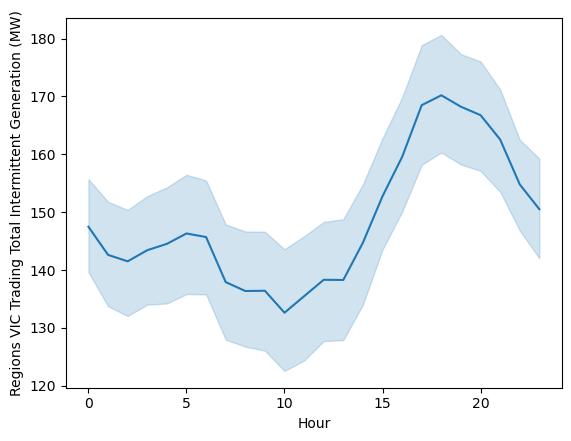

In [27]:
sns.lineplot(x=vic_summer['Hour'], y=vic_summer['Regions VIC Trading Total Intermittent Generation (MW)'])
plt.show()

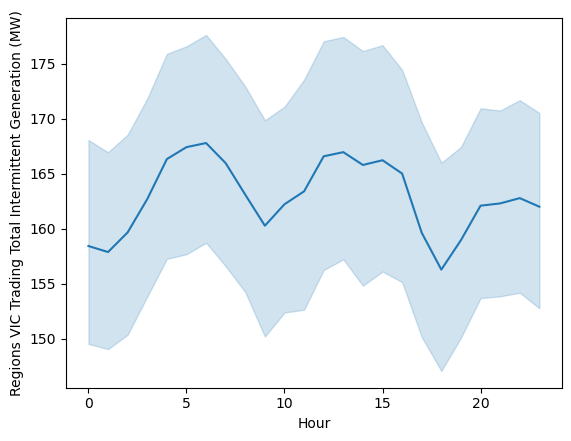

In [28]:
sns.lineplot(x=vic_autumn['Hour'], y=vic_autumn['Regions VIC Trading Total Intermittent Generation (MW)'])
plt.show()

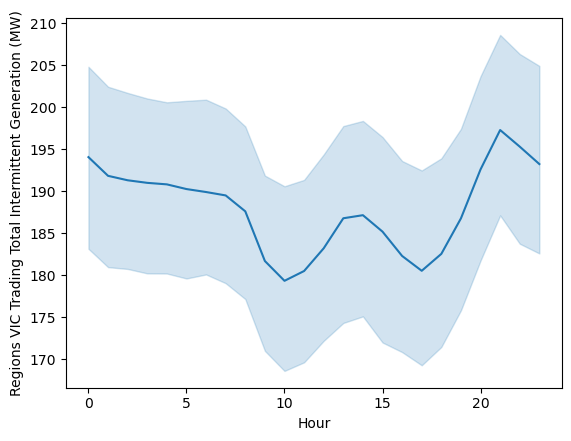

In [29]:
sns.lineplot(x=vic_winter['Hour'], y=vic_winter['Regions VIC Trading Total Intermittent Generation (MW)'])
plt.show()

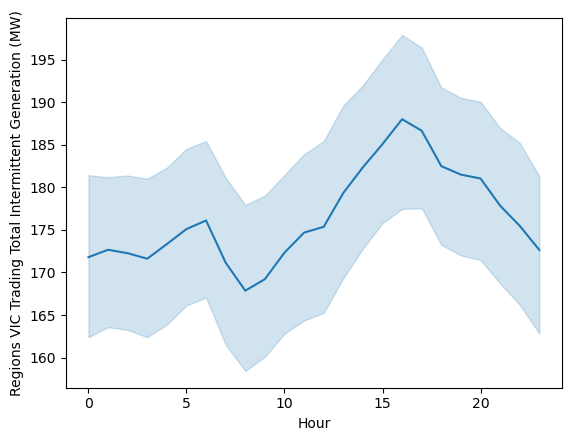

In [30]:
sns.lineplot(x=vic_spring['Hour'], y=vic_spring['Regions VIC Trading Total Intermittent Generation (MW)'])
plt.show()

#### Spring and Summer have similar patterns in terms of Total Intermittent Generation.

It is quite surprising that winter has the highest amount of Total Intermittent Generation, this is probably because winter has more winds and energy generated from wind also counts as Intermittent Generation.

In [27]:
victoria['month'] = victoria['Time (UTC+10)'].dt.month

In [28]:
SUMMER = [12,1,2]
AUTUMN = [3,4,5]
WINTER = [6,7,8]
SPRING = [9,10,11]



for i in list(victoria.index):
    if ((victoria.at[i, 'month'] in SUMMER)):
        victoria.at[i,'season'] = 'summer'
    elif ((victoria.at[i,'month'] in AUTUMN)):
        victoria.at[i,'season'] = 'autumn'
    elif ((victoria.at[i,'month'] in WINTER)):
        victoria.at[i,'season'] = 'winter'
    else:
        victoria.at[i,'season'] = 'spring'

In [29]:
victoria

,Time (UTC+10),Regions VIC Trading Price ($/MWh),Regions VIC Trading Total Intermittent Generation (MW),Regions VIC Operational Demand (MW),Time,Hour,Day,month,season
0,2018-01-01 00:00:00,90.43,146.87,4599,00:00:00,0,1,1,summer
1,2018-01-01 00:30:00,92.46,131.68,4398,00:30:00,0,1,1,summer
2,2018-01-01 01:00:00,87.62,119.98,4238,01:00:00,1,1,1,summer
3,2018-01-01 01:30:00,73.08,123.86,4112,01:30:00,1,1,1,summer
4,2018-01-01 02:00:00,70.18,132.72,3956,02:00:00,2,1,1,summer
...,...,...,...,...,...,...,...,...,...
63452,2021-08-14 22:00:00,49.93,182.52,5492,22:00:00,22,6,8,winter
63453,2021-08-14 22:30:00,62.86,206.23,5344,22:30:00,22,6,8,winter
63454,2021-08-14 23:00:00,32.26,215.20,5204,23:00:00,23,6,8,winter
63455,2021-08-14 23:30:00,25.10,226.95,5268,23:30:00,23,6,8,winter


In [35]:
sns.lineplot(x=victoria['Hour'], y=victoria['Regions VIC Operational Demand (MW)'], hue=victoria['season']).set_title('Seasonal Demand by Hour')
plt.savefig('seasonaldemand_hour.png')

In [39]:
plt.clf()
sns.lineplot(x=victoria['Day'], y=victoria['Regions VIC Operational Demand (MW)'], hue=victoria['season']).set_title('Seasonal Demand by Day')
plt.savefig('seasonaldemand_day.png')

In [41]:
plt.clf()

sns.lineplot(x=victoria['Hour'], y=victoria['Regions VIC Trading Price ($/MWh)'], hue=victoria['season']).set_title('Seasonal Price by Hour')
plt.savefig('seasonalprice_hour.png')

In [42]:
plt.clf()

sns.lineplot(x=victoria['Day'], y=victoria['Regions VIC Trading Price ($/MWh)'], hue=victoria['season']).set_title('Seasonal Price by Day')
plt.savefig('seasonalprice_day.png')

In [17]:
sns.lineplot(x=vic_summer['Hour'], y=vic_summer['Regions VIC Operational Demand (MW)']).set_title('Summer Demand by Hour')
plt.show()

In [18]:
sns.lineplot(x=vic_autumn['Hour'], y=vic_autumn['Regions VIC Operational Demand (MW)']).set_title('Autumn Demand by Hour')
plt.show()

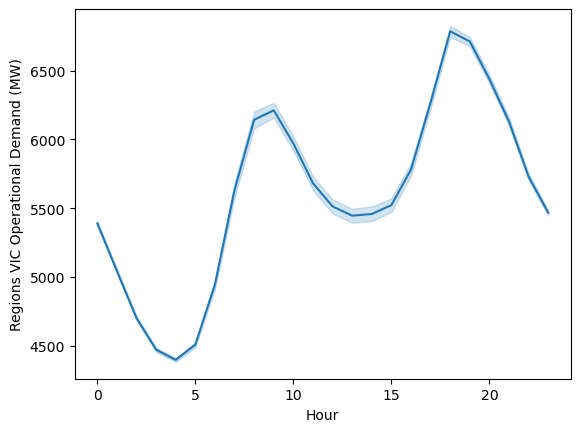

In [33]:
sns.lineplot(x=vic_winter['Hour'], y=vic_winter['Regions VIC Operational Demand (MW)'])
plt.show()

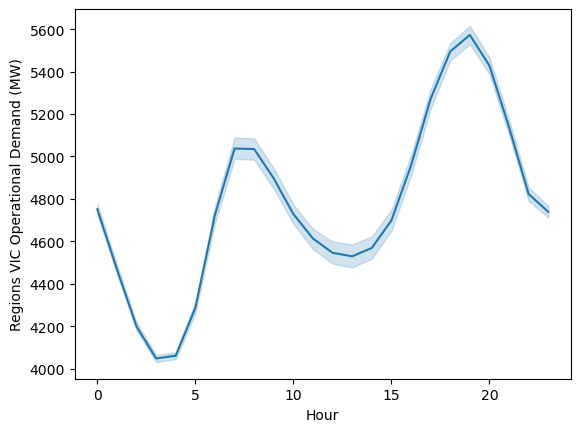

In [34]:
sns.lineplot(x=vic_spring['Hour'], y=vic_spring['Regions VIC Operational Demand (MW)'])
plt.show()

It is quite interesting that the pattern of demand is different between seasons. Summer has a higher operational demand.

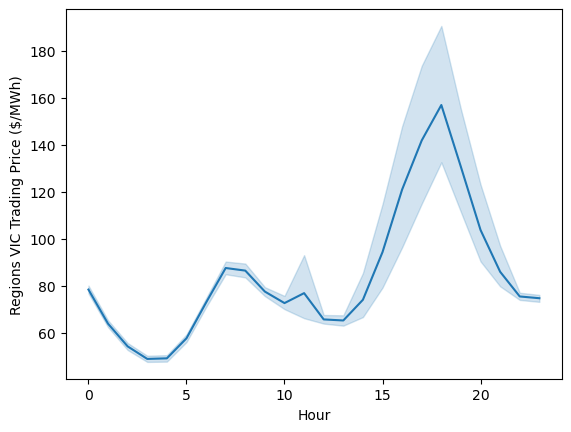

In [35]:
sns.lineplot(x=vic_training['Hour'], y=vic_training['Regions VIC Trading Price ($/MWh)'])
plt.show()

In [9]:
vic_training.to_csv("vic_training.csv", index=False)

## Grouping the full dataset by period (1-48)

In [ ]:
vic_data = pd.read_csv('victoria.csv', parse_dates=[0])

In [ ]:
timelist = [i for i in vic_data['Time'].unique()]
vic_data.loc[vic_data['Time'] == timelist[0], ['period']] = 48

for i in range(1,48):
    vic_data.loc[vic_data['Time'] == timelist[i], ['period']] = i

In [ ]:
vic_data.groupby(['period'])[['Regions VIC Trading Price ($/MWh)']].median()

In [ ]:
lowest_price_period = np.argmin(vic_data.groupby(['period'])[['Regions VIC Trading Price ($/MWh)']].median())+1

In [ ]:
highest_price_period = np.argmax(vic_data.groupby(['period'])[['Regions VIC Trading Price ($/MWh)']].median())+1

In [ ]:
print(lowest_price_period, highest_price_period)

In [ ]:
vic_data.groupby(['period'])[['Regions VIC Trading Price ($/MWh)']].mean()

In [ ]:
lowest_mean_price_period = np.argmin(vic_data.groupby(['period'])[['Regions VIC Trading Price ($/MWh)']].mean())+1

lowest_mean_price_period

In [ ]:
highest_mean_price_period = np.argmax(vic_data.groupby(['period'])[['Regions VIC Trading Price ($/MWh)']].mean())+1

highest_mean_price_period

- there isn't much difference between median and mean price